In [32]:
#!pip install gamry-parser

In [33]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy
import os
import pandas as pd
from collections import Counter
from scipy import stats
import glob
from collections import Counter
import json
import re
from sklearn.cluster import MeanShift, estimate_bandwidth
from scipy import stats, signal
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cluster import MeanShift
import numpy as np 
from numpy.random import default_rng
from scipy.optimize import curve_fit
#!pip install gamry-parser
import gamry_parser as parser
from scipy.signal import find_peaks
rng = default_rng()



In [34]:
## MathTools 

def gaussian(x, A, x0, sig):
    return A*np.exp( -.5*((x-x0)/sig)**2)
 
def multi_gaussianD(x, pars):
    slope=pars[0]
    offset=pars[1]
    fit=x*slope+offset
    fit[fit<0]=0
    plus=2
    nGuass=int((len(pars)-plus)/3)
    for i in range(nGuass):
        fit += gaussian(x, pars[i*3+plus], pars[i*3+plus+1], pars[i*3+plus+2])
    return fit


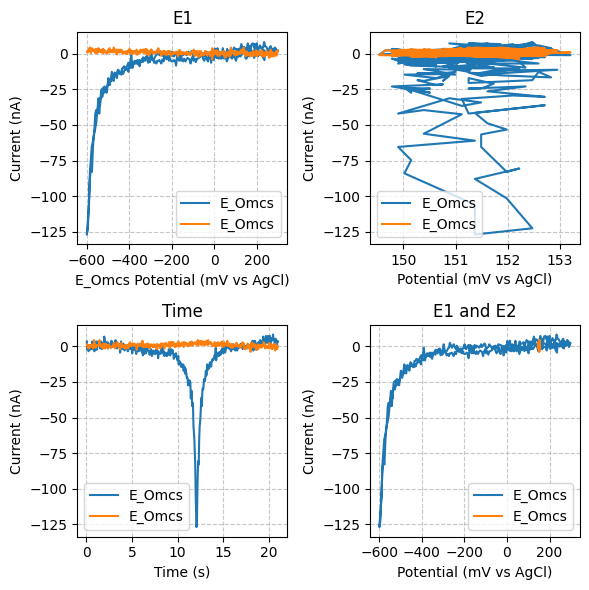

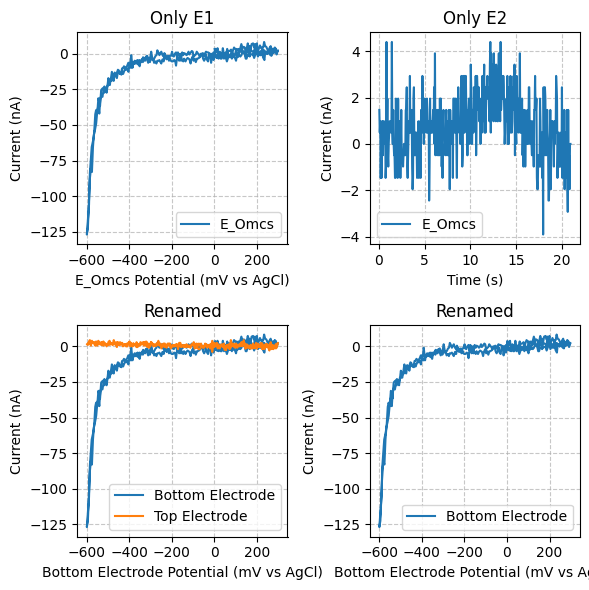

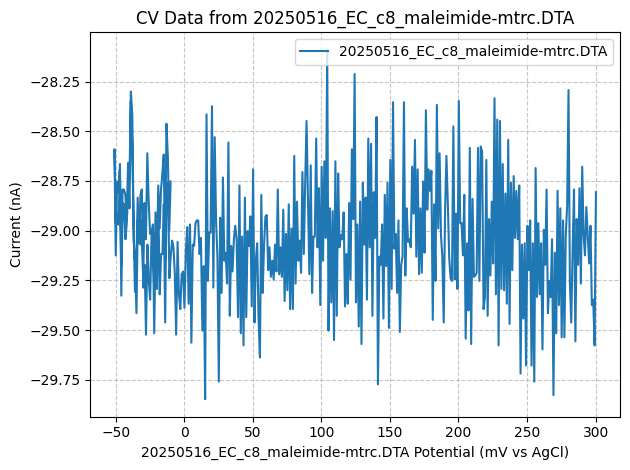

In [ ]:

    
fig,ax = plt.subplots(2,2, figsize=(6,6))
dataset = GalvanosDataset.load (r"\\biod0237\NetworkData\omcS\OMCS_Gating\E_Omcs","Pine", Electrodes.GetElectrode("AgCl"))
dataset.plot (fig=fig,ax=ax[0,0], title='E1'   )
dataset.plot(fig=fig,ax=ax[0,1], title='E2', xAxis='E2' )
dataset.plot(fig=fig,ax=ax[1,0], title='Time', xAxis='Time' )
dataset.plot(fig=fig,ax=ax[1,1], title='E1 and E2', xAxis='All' )
plt.show()

fig,ax = plt.subplots(2,2, figsize=(6,6))
dataset.plot (fig=fig,ax=ax[0,0], title='Only E1', trace_key=['E1'] )
dataset.plot (fig=fig,ax=ax[0,1], title='Only E2', trace_key=['E2'], xAxis='Time' )

dataset.plot (fig=fig,ax=ax[1,0], title='Renamed',  renameData={'E1':'Bottom Electrode', 'E2':'Top Electrode'} )
dataset.plot (fig=fig,ax=ax[1,1], title='Renamed', trace_key=['E1'],  renameData={'E1':'Bottom Electrode'} )
plt.show()


dataset = GalvanosDataset.load (r".\Examples\20250516_EC_c8_maleimide-mtrc.DTA",referenceElectrode= Electrodes.GetElectrode("AgCl"))
dataset.plot ( )
plt.show()


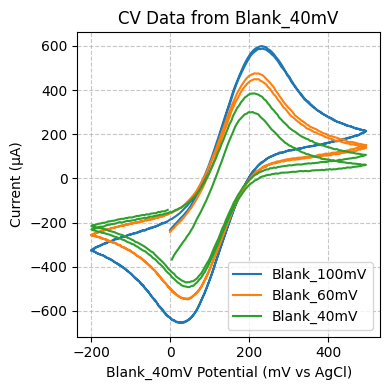

In [ ]:
import gamry_parser as parser
import os
import pandas as pd
import numpy as np
from matplotlib.gridspec import GridSpec

class CommonDiffusionConstants():
    """
    Common diffusion constants for various species in cm^2/s at standard temperature (25°C)
    """
    # Diffusion constants for common species
    H2O = 1.00E-05  # water
    NaCl = 7.00E-06  # sodium chloride
    KCl = 7.00E-06  # potassium chloride
    NaOH = 5.00E-06  # sodium hydroxide
    KOH = 5.00E-06  # potassium hydroxide
    H2SO4 = 5.00E-06  # sulfuric acid
    HCl = 5.00E-06  # hydrochloric acid
    CH3COOH = 1.00E-05  # acetic acid
    Ferrocene = 7.20E-06  # ferrocene
    Unknown = 7.00E-06  # unknown species
    # Common redox species diffusion constants
    Ferrocyanide = 6.50E-06  # ferrocyanide - [Fe(CN)6]^4-
    Ferricyanide = 7.60E-06  # ferricyanide - [Fe(CN)6]^3-
    Dopamine = 6.00E-06      # dopamine
    Ascorbic_acid = 5.40E-06 # ascorbic acid
    Hydrogen_peroxide = 1.40E-05  # hydrogen peroxide
    Hydroquinone = 7.40E-06  # hydroquinone
    Ruthenium_hexamine = 7.50E-06  # [Ru(NH3)6]^3+
    Methylene_blue = 4.80E-06  # methylene blue
    TMPD = 6.60E-06  # N,N,N',N'-tetramethyl-p-phenylenediamine
    Oxygen = 2.10E-05  # dissolved oxygen in water
    Copper_II = 7.20E-06  # Cu^2+ in water
    Zinc_II = 7.00E-06  # Zn^2+ in water

    @staticmethod
    def get_temp_adjusted_diffusion(diffusion_constant, temperature=25):
        """
        Get temperature-adjusted diffusion coefficient for a redox species.
        
        Parameters:
        -----------
        diffusion_constant : float
            Diffusion constant at standard temperature (25°C) in cm^2/s
        temperature : float
            Temperature in Celsius at which to calculate the diffusion constant
            
        Returns:
        --------
        float : Temperature-adjusted diffusion constant in cm^2/s
        
        Notes:
        ------
        Uses the Stokes-Einstein relation: D ∝ T/η
        where viscosity η changes with temperature.
        Approximates with a simplified formula: D(T) ≈ D(25°C) * (1 + 0.02 * (T - 25))
        """
        # Simple linear approximation of temperature effect
        # More accurate models would account for viscosity changes with temperature
        return diffusion_constant * (1 + 0.02 * (temperature - 25))
 
class CommonRedoxConstants:
    """
    Common constants used in electrochemistry calculations.
    All values are in SI units unless otherwise specified.
    """
    # Fundamental constants
    F = 96485.3329  # Faraday constant (C/mol)
    e = 1.602176634e-19  # Elementary charge (C)
    N_A = 6.02214076e23  # Avogadro constant (mol^-1)
    k_B = 1.380649e-23  # Boltzmann constant (J/K)
    R = 8.31446261815324  # Gas constant (J/(mol·K))
    
    # Standard conditions
    T_standard = 298.15  # Standard temperature (K)
    P_standard = 101325  # Standard pressure (Pa)
    
    # Electrochemical constants
    RT_F_at_25C = 25.693  # RT/F at 25°C (mV)
    ln10_RT_F_at_25C = 59.16  # 2.303*RT/F at 25°C (mV) - Nernst factor
    
    # Conversion factors
    V_to_mV = 1000  # Convert V to mV
    mV_to_V = 0.001  # Convert mV to V
    A_to_uA = 1e6  # Convert A to μA
    uA_to_A = 1e-6  # Convert μA to A
    cm2_to_m2 = 1e-4  # Convert cm² to m²
    m2_to_cm2 = 1e4  # Convert m² to cm²
    
    @staticmethod
    def nernst_potential(E0, n, concentration_ratio, temperature=298.15):
        """
        Calculate the electrode potential using the Nernst equation.
        
        Parameters:
        -----------
        E0 : float
            Standard reduction potential (V)
        n : int
            Number of electrons transferred in the redox reaction
        concentration_ratio : float
            Ratio of oxidized to reduced species concentrations [Ox]/[Red]
        temperature : float
            Temperature in Kelvin (default = 298.15 K)
            
        Returns:
        --------
        float : Electrode potential (V)
        """
        R = CommonRedoxConstants.R
        F = CommonRedoxConstants.F
        
        return E0 - (R * temperature / (n * F)) * np.log(concentration_ratio)
    
    @staticmethod
    def randles_sevcik_peak_current(n, area, diffusion, concentration, scan_rate, temperature=298.15, alpha=0.5):
        """
        Calculate the peak current using the Randles-Sevcik equation.
        
        Parameters:
        -----------
        n : int
            Number of electrons transferred in the redox reaction
        area : float
            Electrode area (cm²)
        diffusion : float
            Diffusion coefficient (cm²/s)
        concentration : float
            Concentration of the electroactive species (mol/cm³)
        scan_rate : float
            Scan rate (V/s)
        temperature : float
            Temperature in Kelvin (default = 298.15 K)
        alpha : float
            Transfer coefficient (default = 0.5)
            
        Returns:
        --------
        float : Peak current (A)
        """
        F = CommonRedoxConstants.F
        R = CommonRedoxConstants.R
        
        # Randles-Sevcik equation
        constant = 0.4463 * F * (F / (R * temperature))**0.5
        return constant * n**1.5 * area * diffusion**0.5 * concentration * scan_rate**0.5

class Electrodes:
    """
    Class for converting potentials between different reference electrodes.
    All potentials are in V vs. the specified reference.
    """
    KnownElectrodes_vs_SHE = {
        'SHE': 0.000,  # Standard Hydrogen Electrode
        'SCE': 0.241,  # Saturated Calomel Electrode
        'AgAgCl_sat': 0.197,  # Ag/AgCl in saturated KCl
        'AgAgCl_3M': 0.210,   # Ag/AgCl in 3M KCl
        'AgAgCl_1M': 0.235,   # Ag/AgCl in 1M KCl
        'AgCl': 0.222,        # Silver/Silver Chloride (general)
        'Ag2SO4': 0.654,      # Silver/Silver Sulfate
        'Hg_Hg2SO4': 0.640,   # Mercury/Mercurous Sulfate in saturated K2SO4
        'Hg_Hg2Cl2': 0.268,   # Mercury/Calomel in saturated KCl
        'Hg_HgO': 0.098,      # Mercury/Mercury Oxide in 1M NaOH
        'Cu_CuSO4': 0.314,    # Copper/Copper Sulfate
        'Pd_H2': 0.050,       # Palladium/Hydrogen
        'RHE': 0.000,         # Reversible Hydrogen Electrode (pH dependent)
        'NHE': 0.000,         # Normal Hydrogen Electrode (same as SHE)
        'Unknown': 0.000      # Unknown reference electrode
    }
    
    def __init__(self, name, potential_vs_SHE ):
        self.name = name
        self._referencePotential_SHE_25C =potential_vs_SHE
        self.temperature = 25.0  # Default temperature in Celsius
        self.potential =   self._referencePotential_SHE_25C 
        self.saltconcentration = None  # Concentration of the filling solution (if applicable)
    
    @staticmethod
    def GetElectrode( electrodeName, standardPotential_vs_SHE=None, temperature=25):
        """Allows to create a new electrode with a given name and standard potential.
        If the electrodename is known a standard potential is automatically assigned.
        If the electrodename is not known, a new electrode is created with the given standard potential.
        The standard potential is in V vs. SHE.
        Parameters:
        -----------
        electrodeName : str
            Name of the new electrode
        standardPotential : float
            Standard potential of the new electrode in V vs. SHE
        temperature : float
            Temperature in Celsius (default = 25)
        """
        if electrodeName in Electrodes.KnownElectrodes_vs_SHE:
            standardPotential = Electrodes.KnownElectrodes_vs_SHE[electrodeName]
        else:
            standardPotential = standardPotential or 0.0
        electrode = Electrodes(electrodeName, standardPotential)
        electrode.temperature = temperature
        
        return electrode
    
    
    def CorrectForTemp( self, temperature ):
        """
        Correct the potential for temperature.
        
        Parameters:
        -----------
        temperature : float
            Temperature in Celsius
            
        Returns:
        --------
        float : Corrected potential in V
        """
        # Calculate the correction factor based on temperature
        temp_correction = (temperature - self.temperature) * 0.0002
        # Update the potential
        self.potential += temp_correction
        self.temperature = temperature
        return self.potential
        
    
     
    def CorrectForSaltConcentration(self,  concentration ):
        """
        Correct the potential for concentration.
        
        Parameters:
        -----------
        concentration : float
            Concentration of the salt solution in mol/L
            
        Returns:
        --------
        float : Corrected potential in V
        """
        # Calculate the correction factor based on concentration
        if self.saltconcentration is not None:
            conc_correction = (self.saltconcentration - concentration) * 0.0592
            # Update the potential
            self.potential += conc_correction
            self.saltconcentration = concentration
        return self.potential
        
     
    def convert_potential(self, potentials: np.ndarray, to_reference: 'Electrodes') -> np.ndarray:
        """
        Convert potential values from this electrode's reference to another reference electrode.
        
        Parameters:
        -----------
        potentials : np.ndarray
            Array of potential values to convert (V)
        to_reference : Electrodes
            Target reference electrode to convert to
            
        Returns:
        --------
        np.ndarray : 
            Converted potential values in V vs the target reference electrode
        
        Notes:
        ------
        The conversion is based on the difference between the standard potentials
        of the two reference electrodes vs. SHE.
        """
        # Calculate the difference between reference potentials
        potential_difference = self.potential - to_reference.potential
        
        # Convert the potentials by adding the difference
        # If potential is given as V vs. Self, then:
        # V vs. To_Reference = V vs. Self + (Self_vs_SHE - To_Reference_vs_SHE)
        converted_potentials = potentials + potential_difference
        
        return converted_potentials
         
    
    @staticmethod
    def get_reference_names():
        """Return a list of available reference electrode names."""
        return [attr for attr in dir(Electrodes) 
                if not callable(getattr(Electrodes, attr)) 
                and not attr.startswith("__")]


def _LoadPineExport(rootFolder):
    """Load data from a Pine export folder.
    The function looks for CSV files in the specified folder and its subfolders,
    specifically in the 'Excitation Waveform' and 'Current' directories.
    It extracts the time, potential, and current data from the files and returns
    a dictionary containing the data for each excitation.
    
    """
    excitationFolder = os.path.join(rootFolder, "other plots", "Excitation Waveform")
    currentFolder = os.path.join(rootFolder, "other plots", "Current")

    # get csv files

    excitationFiles = [
        f
        for f in os.listdir(excitationFolder)
        if f.endswith(".csv") and "measured" in f.lower()
    ]
    currentFiles = [
        f
        for f in os.listdir(currentFolder)
        if f.endswith(".csv") and "measured" in f.lower()
    ]

    # load csv files
    excitations = {}
    currents = {}
    for file in excitationFiles:
        filePath = os.path.join(excitationFolder, file)
        df = pd.read_csv(filePath)
        excitations[file] = df
    for file in currentFiles:
        filePath = os.path.join(currentFolder, file)
        df = pd.read_csv(filePath)
        currents[file] = df

    dataset = { 'dataName': os.path.basename(rootFolder) }
    datas = {}
    properties = {}
   
                
    for exitation in excitations.keys():
        # file will be in the form of 'Measured Current (I1).csv'
        # extract the part in the brackets
        if "(" in exitation:
            potentialInside = exitation.split("(")[1].split(")")[0]
            potential = excitations[exitation]

            currentInside = "(" + potentialInside.replace("E", "I") + ")"
            current = currents[[x for x in currents.keys() if currentInside in x][0]]
        else:
            potentialInside = "CV"
            potential = excitations[exitation]
            current = currents["Measured Current.csv"]

        time = potential["Time (s)"].values
        potential = potential["Potential (V)"].values

        timeC = current["Time (s)"].values
        current = current["Current (A)"].values

        alignedCurrent = np.interp(time, timeC, current)
        datas[potentialInside] = pd.DataFrame(
            {
                "Time (s)": time,
                "Potential (V)": potential,
                "Current (A)": alignedCurrent,
            }
        )
        
        
                                    
    dataset["traces"] = datas
    
    return dataset,properties


def _loadGamry(filename):
    gp = parser.GamryParser()
    gp.load(filename=filename)

    dataset = {'dataName': os.path.basename(filename)}
    traces = {}
    properties = {} 
    for i in range(gp.get_curve_count()):
        curveData = gp.get_curve_data(i)
        time = np.array(curveData["T"])
        potential = np.array(curveData["Vf"])
        current = np.array(curveData["Im"])

        trace_key = f"CV{i+1}" if i > 0 else "CV"
        traces[trace_key] = pd.DataFrame({
            "Time (s)": time,
            "Potential (V)": potential,
            "Current (A)": current
        })
        
    for key in gp.header.keys():
        properties[key] = gp.header[key]
        
    if 'SCANRATE' in properties:
        properties['scanrate'] = properties['SCANRATE']
    if 'CYCLES' in properties:
        properties['cycles'] = properties['CYCLES']
    
    dataset["traces"] = traces
    return dataset, properties



_fileLoaders = {}
_fileLoaders[("", ".dta")] = _loadGamry
_fileLoaders[("pine", "")] = _LoadPineExport
        

def get_scale_and_prefix(values, base_unit=""):
    """
    Calculate appropriate scale factor and SI prefix for a dataset
    
    Parameters:
    -----------
    values : array-like
        Data values to scale
    base_unit : str, optional
        Base unit of measurement (e.g. "A", "V", "m")
        
    Returns:
    --------
    scale : float
        Scale factor to apply to values
    prefix : str
        SI prefix combined with the base unit
    """
    min_abs_val = np.min(np.abs(values[values != 0])) if np.any(values != 0) else 1.0
    max_abs_val = np.max(np.abs(values)) if np.any(values != 0) else 1.0
    
    # Determine which value's magnitude should drive the scaling decision
    # For very large ranges, we often want to base on the max value
    magnitude = np.log10( max_abs_val + min_abs_val )
    
    # Define SI prefixes and corresponding scale factors
    prefixes = {
        -15: "f", # femto
        -12: "p", # pico
        -9: "n",  # nano
        -6: "μ",  # micro
        -3: "m",  # milli
        0: "",    # none
        3: "k",   # kilo
        6: "M",   # mega
        9: "G"    # giga
    }
    
    # Find the appropriate scaling factor
    exponent = np.floor(magnitude / 3) * 3
    exponent = min(max(exponent, -15), 9)  # Limit to supported range
    exponent = int(exponent)
    
    scale = 10**(-exponent)
    prefix = prefixes.get(exponent, "") + base_unit
    
    return scale, prefix

           
        
class GalvanosDataset:
    def _initalAnalysis(self):
        maxPotentials = []
        minPotentials = []
        speeds = []
        self.traceInfos = {}
        cycles = []
        for key in self.traces.keys():
            potential = self.traces [key]["Potential (V)"].values
            times = self.traces [key]["Time (s)"].values
           
            maxPotential = np.max(potential)
            minPotential = np.min(potential)

            maxPotentials .append( maxPotential)
            minPotentials .append( minPotential)
                
            peaks, _ = find_peaks(potential,maxPotential*.1)
            mins, _ = find_peaks(-potential,minPotential*-.1)

            combined = np.concatenate((peaks, mins))
            combined.sort()
            
            if len(combined) < 2:
                speed = 0
            else:
                speed = (combined[1] - combined[0]) / (times[combined[1]] - times[combined[0]])
            speeds.append(speed)
            
            cyc =np.min( [len(peaks), len(mins)] )
            cycles.append(cyc)
            self.traceInfos[key] = {
                "maxPotential": maxPotential,
                "minPotential": minPotential,
                "scanrate": speed,
                "peaks": peaks,
                "mins": mins,
                "segments": combined,
                "cycles": cyc ,
            }

        if len(maxPotentials) >1:
            self.properties['offset'] = maxPotentials[1] - maxPotentials[0]
        else :
            self.properties['offset'] = 0
            
        self.properties['maxPotentials'] = np.max(maxPotentials)
        self.properties['minPotentials'] = np.min(minPotentials)
        if 'scanrate' not in self.properties:
            self.properties['scanrate'] = np.mean(speeds)     
        if 'cycles' not in self.properties:
            self.properties['cycles'] = np.min(cycles)           
    
    def RisingSegments(self, referenceTrace = ''):
        """
        Get the rising segments of the traces.
        
        Returns:
        --------
        list : List of rising segments for each trace
        """
        rising = [] 
        if referenceTrace == '':
            referenceTrace = list(self.traces.keys())[0]
        
        segments = self.traceInfos[referenceTrace]["segments"]
        
        for i in range(len(segments)-1):
            start = segments[i]
            end = segments[i+1]
            potential = self.traces[referenceTrace]["Potential (V)"].values
            if potential[start] < potential[end]:
                #create new galvanos dataset with the rising segment
                risingSegment =  GalvanosDataset()
                risingSegment.traces = {}
                for key in self.traces.keys():
                    time = self.traces[key]["Time (s)"].values
                    potential = self.traces[key]["Potential (V)"].values
                    current = self.traces[key]["Current (A)"].values

                    risingSegment.traces[key] = pd.DataFrame({
                        "Time (s)": time[start:end],
                        "Potential (V)": potential[start:end],
                        "Current (A)": current[start:end]
                    })
                risingSegment.properties = self.properties
                
                
                    
        return rising            
    
    """
    Class to handle the dataset for Galvanos.
    It contains methods to load and process data from various file formats.
    """
    def Load(self, filename, instrument, verbose):
        extention = os.path.splitext(filename)[1]
        if verbose:
            print(f"Loading {filename} with extension {extention}")
        for key in _fileLoaders.keys():
            if (key[0].lower() == instrument.lower() or instrument.strip()=='') and key[1].lower() == extention.lower():
                dataset,properties =  _fileLoaders[key](filename)     
                self.filename = filename
                self.traces = dataset["traces"]
                self.properties = properties
                self._initalAnalysis() 
                

        raise ValueError(
            f"Unsupported file format or instrument type: {filename}, {instrument}"
        )        

    def __init__(self ):
        self.filename = ""
        self.traces = {}
        self.Reference = Electrodes.GetElectrode("Unknown", 0)
        self.RedoxSpecies = CommonDiffusionConstants.Unknown
        self.ExperimentTemp = 25
        
    def SetReferenceElectrode(self, referenceElectrode: Electrodes ):
        """
        Set the reference electrode for the dataset.
        
        Parameters:
        -----------
        referenceElectrode : Electrodes
            The reference electrode to set
        """
        self.Reference =  referenceElectrode

    @staticmethod
    def load(filename, instrument="", referenceElectrode=None, verbose=False):
        dataset = GalvanosDataset()
        dataset.load(filename, instrument, verbose)
        if referenceElectrode is not None:
            dataset.SetReferenceElectrode(referenceElectrode)
        return dataset 
    
   
    def plot(self, trace_key=[], xAxis='', renameData={}, useDataSetName=True,  target_reference=None, **kwargs):
        """
        Plot the electrochemical data from the dataset.
        Parameters:
        -----------
        trace_key : list
            List of keys to select specific traces to plot. If empty, all traces are plotted.
        xAxis : str
            X-axis label for the plot. If empty, defaults to "Potential of first trace_key". Allowed values are a trace_key, "Time" or "All" (each trace uses it own potential).
        target_reference : Electrodes
            Target reference electrode for potential conversion. If None, uses the dataset's reference electrode.
        renameData : dict
            Dictionary to rename traces in the plot. Keys are original trace names, values are new names.
        useDataSetName : bool
            If True, use the dataset name as the series name. If False, use the trace names.
        kwargs : dict
            plot kwargs for matplotlib (e.g. title, grid, legend, etc.)
        
        """
        
        
        title = kwargs.pop('title', None)
        grid = kwargs.pop('grid', True)
        legend = kwargs.pop('legend', True)
        fig = kwargs.pop('fig', None)
        ax = kwargs.pop('ax', None)
        # Create figure
        if fig is None or ax is None:
            fig, ax = plt.subplots(1,1,**kwargs)
        
        # Determine which traces to plot
        if not trace_key:
            traces_to_plot = self.traces.keys()
        else:
            traces_to_plot = [key for key in trace_key if key in self.traces]
            if not traces_to_plot:
                raise ValueError(f"No valid trace keys found. Available keys: {list(self.traces.keys())}")
        
        # Process reference electrode conversion
        ref_electrode = target_reference if target_reference is not None else self.Reference
        
        # Determine x-axis data and labels
        x_label = ""
        
        # Plot each trace
        for i, key in enumerate(traces_to_plot):
            trace = self.traces[key]
            
            dataName = key 
            if key in renameData:
                dataName = renameData[key]
            elif useDataSetName:
                dataName = self.filename.split(os.sep)[-1]
                
            
            # Determine x-axis data
            if xAxis == '':
                # Default to potential of first trace
                if i == 0:
                    x_data = trace["Potential (V)"].values
                    if ref_electrode != self.Reference:
                        x_data = self.Reference.convert_potential(x_data, ref_electrode)
                    scalex,prefixx = get_scale_and_prefix(x_data, "V")
                    x_label = f"{dataName} Potential ({prefixx} vs {ref_electrode.name})"
            elif xAxis.lower() == 'time':
                x_data = trace["Time (s)"].values
                scalex,prefixx = get_scale_and_prefix(x_data, "s")
                x_label = f"Time ({prefixx})"
            elif xAxis.lower() == 'all':
                # Each trace uses its own potential
                x_data = trace["Potential (V)"].values
                if ref_electrode != self.Reference:
                    x_data = self.Reference.convert_potential(x_data, ref_electrode)
                scalex,prefixx = get_scale_and_prefix(x_data, "V")
                x_label = f"Potential ({prefixx} vs {ref_electrode.name})"
            elif xAxis in self.traces:
                # Use potential from specific trace
                x_data = self.traces[xAxis]["Potential (V)"].values
                if ref_electrode != self.Reference:
                    x_data = self.Reference.convert_potential(x_data, ref_electrode)
                scalex,prefixx = get_scale_and_prefix(x_data, "V")
                x_label = f"Potential ({prefixx} vs {ref_electrode.name})"
            else:
                raise ValueError(f"Invalid xAxis value. Choose from: {list(self.traces.keys())}, 'Time', or 'All'")
            
            # Scale the current for better visibility
            y_data = trace["Current (A)"].values
            scale, prefix = get_scale_and_prefix(y_data, "A")
            scaled_y_data = y_data * scale
            scaled_x_data = x_data * scalex
            
            # Plot the data
            ax.plot(scaled_x_data, scaled_y_data, label=dataName)
            
        # Set labels and title
        ax.set_xlabel(x_label)
        ax.set_ylabel(f"Current ({prefix})")
        
        if title:
            ax.set_title(title)
        elif not title and title != '':
            ax.set_title(f"CV Data from {os.path.basename(self.filename)}")
        
        if grid:
            ax.grid(True, linestyle='--', alpha=0.7)
        
        if legend:
            ax.legend()
        
        plt.tight_layout()
        return fig, ax
    
fig,ax = plt.subplots(1,1, figsize=(4,4))
dataset = GalvanosDataset.load(r"S:\Research\Brian\CVCurves\BiotinAqueusAndBasic\Blank_100mV","Pine",  Electrodes.GetElectrode("AgCl"))
dataset.plot (fig=fig,ax=ax , useDataSetName=True  )
dataset = GalvanosDataset.load(r"S:\Research\Brian\CVCurves\BiotinAqueusAndBasic\Blank_60mV","Pine", Electrodes.GetElectrode("AgCl"))
dataset.plot (fig=fig,ax=ax, useDataSetName=True   )
dataset = GalvanosDataset.load(r"S:\Research\Brian\CVCurves\BiotinAqueusAndBasic\Blank_40mV","Pine", Electrodes.GetElectrode("AgCl"))
dataset.plot (fig=fig,ax=ax , useDataSetName=True  )
plt.show()

In [ ]:
def annot(xmax,ymax,text,dir, ax=None):
 
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="data",              arrowprops=arrowprops, bbox=bbox_props, ha="left", va="top")
    if dir>0:
        ax.annotate(text, xy=(xmax, ymax), xytext=(xmax-.1,ymax+.5), **kw)
    else:
        ax.annotate(text, xy=(xmax, ymax), xytext=(xmax+.02,ymax+.5), **kw)

def annot_max(x,y,text,dir, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()

    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="data",              arrowprops=arrowprops, bbox=bbox_props, ha="left", va="top")
    if dir>0:
        ax.annotate(text, xy=(xmax, ymax), xytext=(xmax-.1,ymax+.5), **kw)
    else:
        ax.annotate(text, xy=(xmax, ymax), xytext=(xmax+.02,ymax+.5), **kw)
        
 



def CalcAreaFromOxide(CV,fig):
    nCycles=float(CV.totalcycle.iloc[0])
   
    timeStep =np.mean(np.diff(CV.Time))
    plt.plot(CV.V*1000,CV.C*1e6)
    value =   CV.C *-1e6
    height = np.max(value)/2

    peak , _ =  scipy.signal.find_peaks(value, height=height)
    peakVoltageBelow = np.mean(CV.V[peak])
    peakCurrentBelow = np.mean(CV.C[peak])
    CV2=CV.loc[ (np.abs(CV.V- peakVoltageBelow)<.25) & (CV.scanrate<0)]
    height = np.min(CV2.C)/2
    FWHM=CV2.V.loc[ np.abs(CV2.C-height)<5e-6]
    FWHM_b=np.max(FWHM)-np.min(FWHM)
   
    plt.plot(CV2.V*1000,CV2.C*1e6)

    #print( np.sum(CV2.C-CV2.C.iloc[0])*timeStep*-1 ,'C')
    #print( np.sum(CV2.C-CV2.C.iloc[0])*timeStep* -6.24150975*1e18 ,'electrons')
    #print( np.sum(CV2.C-CV2.C.iloc[0])*timeStep* -6.24150975*1e18 *1.47968E-19/2*1e4,'cm^2')
    C_B=  np.sum(CV2.C-CV2.C.iloc[0])*timeStep/nCycles
    areaBelow_m2= np.sum(CV2.C-CV2.C.iloc[0])*timeStep * -6.24150975*1e18*1.47968E-19/2/nCycles/2
    #print( areaBelow_m2*1e4, 'cm^2')


    height = np.max(CV.C *1e6)*.75
    peak , _ =  scipy.signal.find_peaks(CV.C *1e6, height=height)
    
    peakVoltageAbove = np.mean(CV.V[peak])
    peakCurrentAbove = np.mean(CV.C[peak])


    CV2=CV.loc[ (np.abs(CV.V-    peakVoltageAbove)<.25) & (CV.scanrate>0)]
    height = np.max(CV2.C) /2
    FWHM=CV2.V.loc[ np.abs(CV2.C-height)<5e-6]
    FWHM_a=np.max(FWHM)-np.min(FWHM)
    
    plt.plot(CV2.V*1000,CV2.C*1e6)
    plt.ylabel('Current (uA)')
    plt.xlabel('Potential (mV) vs Ag/AgCl')
   
    C_A=np.sum(CV2.C-CV2.C.iloc[0])*timeStep/nCycles
    areaAbove_m2= np.sum(CV2.C-CV2.C.iloc[0])*timeStep * 6.24150975*1e18*1.47968E-19/2/nCycles/2
    
    
    E0=(peakVoltageBelow+peakVoltageAbove )/2.0
    C_E0=np.mean( CV.C.loc[ np.abs(CV.V-E0)<.05])
    Er=(peakVoltageBelow-E0)
    Eo=(peakVoltageAbove-E0 )
    
    voltageTexts ='E0: %.2f mV\n'%( E0*1000)
    voltageTexts +='E-:\n   %.2f mV\n   ip: %.2f uA\n   FWHM: %.2f mV\n   Q: %.2f mC\n   ~e: %.2f \n' % ((Er+E0)*1000,peakCurrentBelow*1e6,FWHM_b*1000,C_B*1000,90.6/(FWHM_b*1000) )
    voltageTexts +='E+:\n   %.2f mV\n   ip: %.2f uA\n   FWHM: %.2f mV\n   Q: %.2f mC\n   ~e: %.2f \n'%( (Eo+E0)*1000,peakCurrentAbove*1e6,FWHM_a*1000,C_A*1000,90.6/(FWHM_a*1000) )
    voltageTexts +='deltaE: %.2f mV'% (-1000*( Er-Eo))
    
    sig_peaks=np.array([E0,Er+E0,Eo+E0])*1000
    contur_min=[0,0,0]
    contur_max=np.array([C_E0,peakCurrentBelow,peakCurrentAbove])*1e6
    plt.vlines(x=sig_peaks, ymin=contur_min, ymax=contur_max,colors='r')
    
    area_stats={'peakVoltageBelow':peakVoltageBelow,
            'peakCurrentBelow':peakCurrentBelow,
            'areaBelow_m2':areaBelow_m2,
            'peakVoltageAbove':peakVoltageAbove,
            'peakCurrentAbove':peakCurrentAbove,
            'areaAbove_m2':areaAbove_m2,
            'E0':E0,
            'deltaE':np.abs(Er-E0),
            'FWHM':1
           }
    
    areaB='\nArea: %.2f cm^2 Disk Radius:%.2f cm'%( area_stats['areaBelow_m2']*1e4, np.sqrt(area_stats['areaBelow_m2']*1e4/3.1415))
    areaB+='\nArea: %.2f cm^2 Disk Radius:%.2f cm'%( area_stats['areaAbove_m2']*1e4, np.sqrt(area_stats['areaAbove_m2']*1e4/3.1415))
    
    
    plt.gcf().text(1,.25,   voltageTexts+'\n' +areaB + '\n'  , fontsize=10)
    #annot(area_stats['peakVoltageBelow']*1000,area_stats['peakCurrentBelow']*1e6,'%.2f E(mV)' % (1000*(Er+E0)),1 )
    #annot(area_stats['peakVoltageAbove']*1000,area_stats['peakCurrentAbove']*1e6,'%.2f E(mV)' % (1000*(Eo+E0)),1 )
    
    return area_stats

 


def FindMolecules(CV): 
    C=np.array(CV.C)*-1
    VV=np.array(CV.V)*-1
    CC=C


    model = LinearRegression()
    x = np.array(VV).reshape((-1, 1))
    y = np.array( CC)
    model.fit(x,y)

    slope=model.coef_.ravel()[0]
    fit=( VV* slope)

    dV=np.abs(np.mean(np.diff(CV.V)))

    C=CC-fit
    intercept=-1*np.min(C)
    C=C+intercept
    preHeight=np.sum(C)

    IC=C[(VV>.4) & (VV<1.05)]
    IV=VV[(VV>.4) & (VV<1.05)]
    peakMax=IV[np.argmax(IC)]

     
    C=C/np.max(C) 

    X=[]
    for i in range(len(C)):
        for j in range(int(C[i]*6000)):
            X.append(VV[i]+rng.standard_normal()*dV*3)

    X=np.array(X)
    Y=X.reshape(-1, 1)
    
    bandwidth = estimate_bandwidth(Y, quantile=0.15, n_samples=5000)
    guessedCoverage=[]
    bestGuess=None
    for size_BW in range(1,6):
        ms = MeanShift(bandwidth=bandwidth/size_BW, bin_seeding=True)
        ms.fit(Y)
        labels_unique = np.unique(ms.labels_)
        cluster_centers=ms.cluster_centers_.ravel()
        std=[]
        weights=[]
        for l in labels_unique:
            YY= X[ms.labels_==l]
            weights.append( len(YY))
            std.append( np.std(YY))
        weights=np.array(weights)
        weights=weights/np.sum(weights)

        guess =[ slope,-1*intercept]
        for i in range(len(cluster_centers)):
            guess.append(weights[i])
            guess.append(cluster_centers[i])
            guess.append(std[i] )

        guess=np.array(guess).ravel().astype(float)  

        back=multi_gaussianD(VV, guess)       
        scale=preHeight/np.sum(back)

        guess =[ slope,-1*intercept]
        for i in range(len(cluster_centers)):
            guess.append(weights[i]*scale*.7)
            guess.append(cluster_centers[i])
            guess.append(std[i])

        guess=np.array(guess).ravel().astype(float)  

        back=multi_gaussianD(VV, guess)      

        if np.any(np.abs( cluster_centers-peakMax)<.001)==False:
            vP=np.mean( CC[np.abs(VV-peakMax)<.01])-np.mean( back[np.abs(VV-peakMax)<.01])
            guess=np.concatenate([guess, [vP,peakMax,.01]])

        try:
            popt, pcov = curve_fit(multi_gaussian,  VV ,CC, guess)

            plus=2
            nGuass=int((len(popt)-plus)/3)
            dum=np.zeros_like(popt)
            dum[:plus]=popt[:plus]
            back=multi_gaussianD(VV, dum)
            actual=np.zeros_like(back)
            hasPeak=False
            for i in range(nGuass):
                amp=popt[i*3+plus]
                energy=popt[i*3+plus+1]
                sig=popt[i*3+plus+2]
                g1=gaussian(VV, amp, energy, sig)

                if np.abs(energy-peakMax)<.1 and sig<.04   :
                    actual+=g1
                    hasPeak=True
                else:
                    back+=g1

            if hasPeak:
                error=np.mean((CC-(back+actual))**2)
                Q= dV*np.abs(np.sum(actual)/np.mean(CV.scanrate)) #C
                r_cm=400 /10000
                areaCM2=r_cm*r_cm*3.14
                M=Q/9.648533212e4 #9.648533212e4 C⋅mol−1
                Mol=M*6.02214076e23
                MolPcm2=Mol/areaCM2
                dI=[error,back,actual,energy,Q,Mol]
                if len(guessedCoverage)>0:
                    if error<bestGuess[0]:
                        bestGuess=dI
                else:
                    bestGuess=dI

                guessedCoverage.append([error,energy,Q,Mol])
        except:
            pass
            #print('%.2f V'%(-1*energy),'%.2E C,'%Q,'%.3E molecules'%(Mol),',%.3E molecules/cm^2'%(MolPcm2),',%.3E molecules/nm^2'%(Mol/7.85375E+11) )

    
    plt.plot(-1*VV,-1*(bestGuess[2]+bestGuess[1]))
    plt.plot(-1*VV, -1*bestGuess[1])
    
    return guessedCoverage

def sigTest(x, A, x0, sig, m,b,A2,sig2,x2,p):
    xx=x-x0
    xx2=np.exp(-1*(x-x2)*sig2)
    return A2*xx2/(1+xx2 ) +b+m*x 

def gaussian_Lin2(x, A, x0, sig, m,b,p):
    xx=x-x0
    return A*np.exp( -.5*np.abs(xx/sig)**p)+b+m*x

def gaussian_Lin3(x, A, x0, sig, m,b,A2,sig2,x2,p):
    xx=x-x0
    xx2=np.exp(-1*(x-x2)*sig2)
    return A*np.exp( -.5*np.abs(xx/sig)**p)+A2*xx2/(1+xx2 ) +b+m*x

def MajoritySlope(volts,current,direction):
    cross = volts[ np.argmin( np.abs(current))]
    if (direction)>0:
        vCross= volts[volts<cross]
        cCross= current[volts<cross]
    else:
        vCross= volts[volts>cross]
        cCross= current[volts>cross]
    slopes=[]
     
    for i in range( len(cCross)-8):
        slopes.append( (cCross[i+8] -cCross[i])/(vCross[i+8] -vCross[i]))
    v,bins=np.histogram(slopes)
    
    ind=np.argmax(v)
   
    slopeThresh=(bins[ind+1]+bins[ind])/2
    
    cs=[]
    vs=[]
    for i in range( len(cCross)-8):
        if  (cCross[i+8] -cCross[i])/(vCross[i+8] -vCross[i])<slopeThresh:
            cs.extend(cCross[i:i+7])
            vs.extend(vCross[i:i+7])

    p= np.polyfit(vs,cs, 1)
    return p

def DuckParams(filename,CV):
    
    CV_sub=CV.loc[(CV.scanrate<0) & (CV.cycle==0)]
    f, ax = plt.subplots()
     
    plt.plot(CV_sub.V*1000,1e6*CV_sub.C,label=os.path.basename(cv))        
    
    plt.ylabel("Current (uA)")
    plt.xlabel('Potential (mV vs Ag/AgCl)')
                       
    CV_up=CV.loc[(CV.scanrate>0) & (CV.cycle==1)]
    volts_up=np.array(CV_up.V)
    current_up=np.array(CV_up.C) 
    ind=np.argsort(volts_up)
    volts_up=volts_up[ind]
    current_up=current_up[ind]
    
    pAbove = MajoritySlope(volts_up,current_up,1)
    
    dvdP=np.mean(np.diff(volts_up))
        
    try:
        volts=np.array(CV_sub.V)
        current=np.array(CV_sub.C) 
        
        pBelow = MajoritySlope(volts,current,-1)
        
        peakIndex=np.argmin(current)
        peakV= volts[peakIndex ]
        Eb=peakV
        peakC= current[peakIndex ]
        #          A         x    sig    m     b    A2            sig2     x2     power
        guess=[ peakC*.8,  peakV,  .1, .0001,  0,    peakC*.5,      10   ,  peakV ,  2]
        try:
            poptB, pcov = curve_fit(gaussian_Lin3,  volts ,current, guess) 
            plt.plot(volts*1000,1e6* gaussian_Lin3(volts,poptB[0],poptB[1],poptB[2],poptB[3],poptB[4],poptB[5],poptB[6] ,poptB[7],poptB[8]))
        except:
            pass
        
        flat_Current =current_up-volts_up*pAbove[0]-pAbove[1]
        flat_Current=flat_Current[flat_Current>0]
        dt=CV.scanrate[0]/dvdP
        Q=np.sum(flat_Current)*dt
        IMin= peakC
        IMax=  np.poly1d(pAbove)(peakV)
        Ip=np.abs(IMax-IMin)
        text= filename +'\n\nIp= %.2f uA\nEp= %.2f mV\n'%( Ip*1e6,1000*peakV)
        text += 'Iback = %.2f uA\nQ = %.2f C\n'%(1e6* pBelow[-1], Q)
        text += 'Kt = %.2f ms-1\n'%( 1000*Ip/Q)
        
        plt.text(.75, .5, text, ha='left', va='top', transform=ax.transAxes)
        plt.vlines(x=1000*peakV, ymin=1e6*IMin, ymax=1e6*IMax,colors='r')
        
    except:
        pass

    try:
        
        
        plt.plot(volts_up*1000,1e6*current_up,label=os.path.basename(filename))
    
        current_up=current_up[(volts_up>0)& (volts_up<.9)]
        volts_up=volts_up[(volts_up>0) & (volts_up<.9)]
        flat_Current =current_up-volts_up*pAbove[0]-pAbove[1]
        

        peakIndex=np.argmax(current_up)
        peakV= volts_up[peakIndex ]
        peakC= current_up[peakIndex ]
        if np.abs(peakV-np.max(volts_up))<.05:
            peakIndex=np.argmax(flat_Current)
            peakV= volts_up[peakIndex ]
            peakC= flat_Current[peakIndex ]
            
        hm=np.max(flat_Current)/2   
        fwhm=peakIndex
        for i in range(peakIndex,len(flat_Current)):
            if flat_Current[i]<hm:
                fwhm=i
                break
        for i in range(peakIndex,0,-1):
            if flat_Current[i]<hm:
                #print([volts_up[i ],volts_up[fwhm ]])
                #plt.plot([volts_up[i ]*1000,1000*volts_up[fwhm ]],[1e6*current_up[i ],1e6*current_up[fwhm ]])
                fwhm=2*(volts_up[i ]-volts_up[fwhm ])
                 
                break
        
        sigma =   2.355*fwhm
        

       
        #          A         x    sig    m     b    A2            sig2       x2      power
        guess=[ peakC*.8,  peakV,  .1, .0001,  0,    peakC*.1,      10   ,  peakV ,  2]
        try:
            poptU, pcov = curve_fit(gaussian_Lin3,  volts_up ,current_up, guess) 
            plt.plot(volts_up*1000,1e6* gaussian_Lin3(volts_up,poptU[0],poptU[1],poptU[2],poptU[3],poptU[4],poptU[5],poptU[6] ,poptU[7],poptU[8]))
            #fwhm=poptU[2]/2.355
        except:
            try:
                guess=[ peakC*.8,  peakV,  sigma, .0001,  0,    peakC*.1,      10   ,  peakV ,  2]
                poptU, pcov = curve_fit(gaussian_Lin3,  volts_up ,current_up, guess) 
                plt.plot(volts_up*1000,1e6* gaussian_Lin3(volts_up,poptU[0],poptU[1],poptU[2],poptU[3],poptU[4],poptU[5],poptU[6] ,poptU[7],poptU[8]))
                #fwhm=poptU[2]/2.355
            except:
                pass
        
        flat_Current =current_up-volts_up*pBelow[0]-pBelow[1]
        flat_Current=flat_Current[flat_Current>0]
        dt=CV.scanrate[0]/dvdP
        Q=np.sum(flat_Current)*dt
        IMax= peakC
        IMin=  np.poly1d(pBelow)(peakV)
        Ip=np.abs(IMax-IMin)
        text='Ip= %.2f uA\nEp= %.2f mV\n'%( Ip*1e6,1000*peakV)
        text += 'Iback = %.2f uA\nQ = %.2f C\n'%(1e6* pAbove[-1], Q)
        #text += 'FWHM = %.2f mV\n'%(1000* fwhm)
        text += 'E0 = %.2f mV\ndE = %.2f mV\nKt = %.2f ms-1\n'%(1000*(Eb+peakV)/2,1000*np.abs(Eb-peakV),1000*Ip/Q)
        plt.text(.01, .99, text, ha='left', va='top', transform=ax.transAxes)
        
        
        plt.vlines(x=1000*peakV, ymin=1e6*IMin, ymax=1e6*IMax,colors='r')
    except    Exception as ex:
        print(ex)
    print(filename)
    


In [ ]:
CVs={}
cc=0
for dataDir in allFiles:
    print(dataDir)
    #if the extension is .csv then load through a pine
    if os.path.splitext(dataDir)[1]=='.csv' or os.path.splitext(dataDir)[1]=='':
        cv=loadPine(dataDir)
    elif os.path.splitext(dataDir)[1].lower()=='.dta':
        cv=loadGamry(dataDir)
    plt.plot(cv.V,cv.C*1e6,label=os.path.basename(dataDir))
    CVs[os.path.basename(dataDir)]=cv

print(cc)    
plt.title="All CVs"
plt.xlabel("E/V vs Ag/AgCl")
plt.ylabel("C (uA)") 
 
plt.show()
 
 
reductive={}
areaCV={}
onlyCV={}
onlyCVs=True
for cv in CVs:
    potentialMax = CVs[cv].V.max()
    potentialMin = CVs[cv].V.min()
    if onlyCVs:
        print(cv)
        onlyCV[cv]=CVs[cv]
    elif potentialMin<-.8 and potentialMax<1 :
        reductive[cv]=CVs[cv]
    else:
        areaCV[cv]=CVs[cv]

 

NameError: name 'allFiles' is not defined

C:\Users\bashc\AppData\Local\Temp\ipykernel_29484\330067445.py:313: RuntimeWarning: overflow encountered in exp
  xx2=np.exp(-1*(x-x2)*sig2)
C:\Users\bashc\AppData\Local\Temp\ipykernel_29484\330067445.py:314: RuntimeWarning: invalid value encountered in divide
  return A*np.exp( -.5*np.abs(xx/sig)**p)+A2*xx2/(1+xx2 ) +b+m*x


token_ferricy_pc.DTA


d:\PythonProj\mlStuff\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


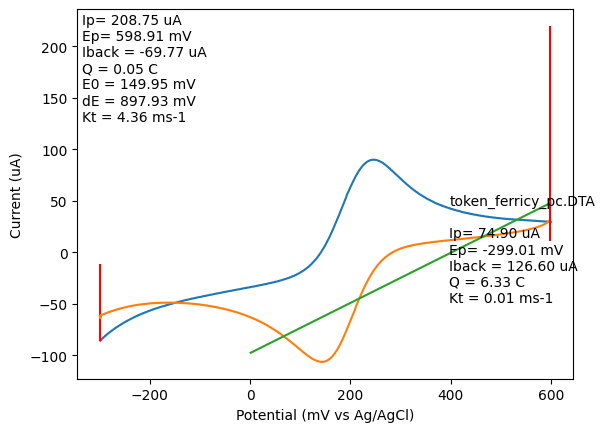

In [ ]:
surfaceArea_m2=0
 
for filename in onlyCV:
    try:
        CV=onlyCV[filename]
        DuckParams(filename,CV)
        plt.savefig(outFolder + "\\" + filename + '.jpg')
        plt.show() 
    except:
        pass
    
for filename in areaCV:
    try:
        fig=plt.figure()
        CalcAreaFromOxide(areaCV [filename],fig)   
        plt.savefig(outFolder + "\\" + filename + '.jpg')
        plt.show() 
    except:
        pass
outFolder=fileFolder
table='Peak Potential (mV), Molecules, Molecules/nm^2, error, Molecules/ cm^2, error\t'
for filename in reductive:
    try:
        print(filename)
        #if cv not in 'CV Experiment [2022-DEC-02 1056 #18]CV Experiment [2022-DEC-02 1057 #19]CV Experiment [2022-DEC-02 1059 #20]': 
        CV=reductive[filename]
        plt.figure(figsize=(20,5))
        plt.plot(CV.V,CV.C,label=os.path.basename(filename))
        CV=CV.loc[(CV.scanrate<0) & (CV.cycle==0)]


        plt.title="Reductive CVs " + filename
        plt.xlabel("E/V vs Ag/AgCl")
        plt.ylabel("Current (A)") 
        guesses=FindMolecules(CV)
        energy=np.sum([x[1]*1/x[0] for x in guesses])/np.sum([1/x[0] for x in guesses])
        Mol=np.sum([x[-1]*1/x[0] for x in guesses])/np.sum([1/x[0] for x in guesses])
        Q=np.sum([x[-2]*1/x[0] for x in guesses])/np.sum([1/x[0] for x in guesses])
        sdMol=np.std([x[-1] for x in guesses])
        #400um diameter
        r_um=400
        r_nm=r_um*1000
        r_cm=r_um/10000
        area_um2=r_um**2*3.14 # um^2
        area_nm2=r_nm**2*3.14 # um^2
        area_cm2=r_cm**2*3.14 # um^2


        textstr=cv+'\nPeak    : %.2f V\nCharge: %.2E C\nDensity: %.1f molecules/nm^2\nDensity: %.1f  nm^2/molecule\nDensity: %.2E molecules/cm^2\n'%(  energy, Q,Mol/area_nm2,area_nm2/Mol,  Mol/area_cm2 )
        textstr+='Rate    : %d mV/s\n'%(np.mean(CV.scanrate*1000))
        #plt.text(np.min(CV.V), (np.max(CV.C)*2+np.max(CV.C))/3, textstr, fontsize=10)
        plt.gcf().text(.9,.25,  textstr  , fontsize=12)

        print( '%.2f V, %.2E +/- %.2E molecules/nm^2, %.2E  +/- %.2E molecules/cm^2'%(  energy, Mol/area_nm2, sdMol/area_nm2, Mol/area_cm2, sdMol/area_cm2))
        table+='%.2f , %.2E,%.2E,%.2E,%.2E'%(  energy, Mol/area_nm2, sdMol/area_nm2, Mol/area_cm2, sdMol/area_cm2)
        plt.savefig(outFolder + "\\" + cv + '.jpg')
        plt.show()    
    except:
        pass



NameError: name 'energy' is not defined

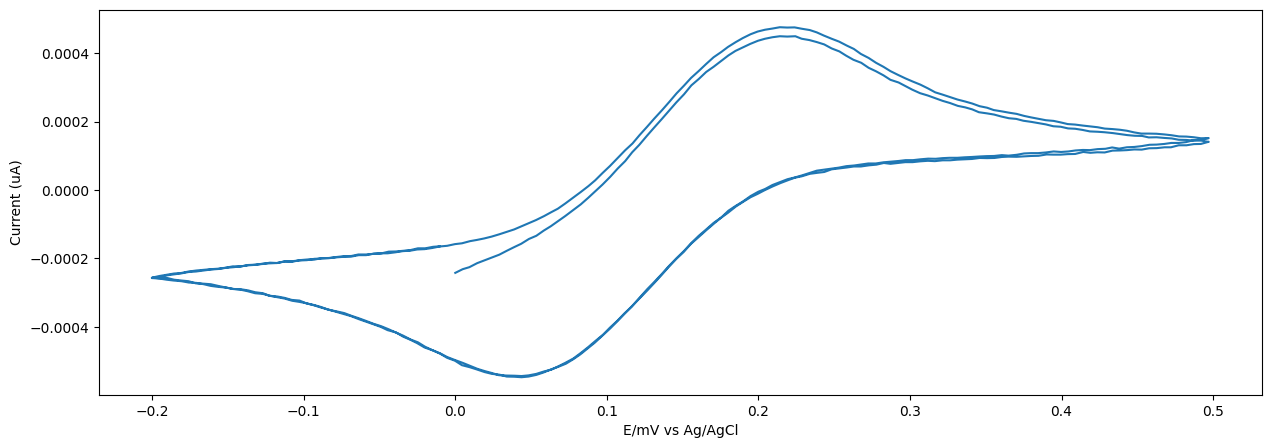

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(CV.V,CV.C,label=os.path.basename(cv))

plt.title="Reductive CVs " + cv
plt.xlabel("E/mV vs Ag/AgCl")
plt.ylabel("Current (uA)") 


textstr='Peak    : %.2f V\nDensity: %d mol/nm^2\nDensity: %.2Emol/cm^2\n'%(  energy, Mol/area_nm2,  Mol/area_cm2 )
textstr+='Rate    : %d mV/s\n'%(np.mean(CV.scanrate*1000))
plt.text(np.min(CV.V), np.mean(CV.C), textstr, fontsize=10)

print( '%.2f V, %.2E +/- %.2E molecules/nm^2, %.2E  +/- %.2E molecules/cm^2'%(  energy, Mol/area_nm2, sdMol/area_nm2, Mol/area_cm2, sdMol/area_cm2))
table+='%.2f , %.2E,%.2E,%.2E,%.2E'%(  energy, Mol/area_nm2, sdMol/area_nm2, Mol/area_cm2, sdMol/area_cm2)
plt.show()     

In [ ]:
C=np.array(CV.C)*-1
VV=np.array(CV.V)*-1
CC=C


model = LinearRegression()
x = np.array(VV).reshape((-1, 1))
y = np.array( CC)
model.fit(x,y)

slope=model.coef_.ravel()[0]
fit=( VV* slope)

dV=np.abs(np.mean(np.diff(CV.V)))

C=CC-fit
intercept=-1*np.min(C)
C=C+intercept
preHeight=np.sum(C)

IC=C[(VV>.4) & (VV<1.05)]
IV=VV[(VV>.4) & (VV<1.05)]
peakMax=IV[np.argmax(IC)]

plt.plot(IV,IC)

C=C/np.max(C) 

X=[]
for i in range(len(C)):
    for j in range(int(C[i]*6000)):
        X.append(VV[i]+rng.standard_normal()*dV*3)

X=np.array(X)
Y=X.reshape(-1, 1)
v,b=np.histogram(X,bins=70)
plt.plot(b[1:],v/np.max(v))
plt.plot(VV,C/np.max(C))
plt.show()


bandwidth = estimate_bandwidth(Y, quantile=0.15, n_samples=5000)
guessedCoverage=[]
bestGuess=None
for size_BW in range(1,6):
    ms = MeanShift(bandwidth=bandwidth/size_BW, bin_seeding=True)
    ms.fit(Y)
    labels_unique = np.unique(ms.labels_)
    cluster_centers=ms.cluster_centers_.ravel()
    std=[]
    weights=[]
    for l in labels_unique:
        YY= X[ms.labels_==l]
        weights.append( len(YY))
        std.append( np.std(YY))
    weights=np.array(weights)
    weights=weights/np.sum(weights)

    guess =[ slope,-1*intercept]
    for i in range(len(cluster_centers)):
        guess.append(weights[i])
        guess.append(cluster_centers[i])
        guess.append(std[i] )

    guess=np.array(guess).ravel().astype(float)  

    back=multi_gaussianD(VV, guess)       
    scale=preHeight/np.sum(back)
    
    guess =[ slope,-1*intercept]
    for i in range(len(cluster_centers)):
        guess.append(weights[i]*scale*.7)
        guess.append(cluster_centers[i])
        guess.append(std[i])

    guess=np.array(guess).ravel().astype(float)  

    back=multi_gaussianD(VV, guess)      
    
    if np.any(np.abs( cluster_centers-peakMax)<.001)==False:
        print('peak suggest')
        vP=np.mean( CC[np.abs(VV-peakMax)<.01])-np.mean( back[np.abs(VV-peakMax)<.01])
        guess=np.concatenate([guess, [vP,peakMax,.01]])
    
    
    popt, pcov = curve_fit(multi_gaussian,  VV ,CC, guess)

    plus=2
    nGuass=int((len(popt)-plus)/3)
    dum=np.zeros_like(popt)
    dum[:plus]=popt[:plus]
    back=multi_gaussianD(VV, dum)
    actual=np.zeros_like(back)
    hasPeak=False
    for i in range(nGuass):
        amp=popt[i*3+plus]
        energy=popt[i*3+plus+1]
        sig=popt[i*3+plus+2]
        g1=gaussian(VV, amp, energy, sig)
        
        if np.abs(energy-peakMax)<.1 and sig<.04   :
            actual+=g1
            hasPeak=True
        else:
            back+=g1

    if hasPeak:
        error=np.mean((CC-(back+actual))**2)
        Q=np.abs(np.sum(actual)/np.mean(CV.scanrate)) #C
        areaCM2=3.1415*.1*.1
        M=Q/9.648533212e4 #9.648533212e4 C⋅mol−1
        Mol=M*6.02214076e23
        MolPcm2=Mol/areaCM2
        dI=[error,back,actual,energy,Q,Mol]
        if len(guessedCoverage)>0:
            if error<bestGuess[0]:
                bestGuess=dI
        else:
            bestGuess=dI
            
        guessedCoverage.append([error,energy,Q,Mol])
        print('%.2f V'%(-1*energy),'%.2E C,'%Q,'%.3E molecules'%(Mol),',%.3E molecules/cm^2'%(MolPcm2),',%.3E molecules/nm^2'%(Mol/7.85375E+11) )

plt.plot(VV,CC)
plt.plot(VV,bestGuess[2]+bestGuess[1])
plt.plot(VV, bestGuess[1])
plt.show()
     

In [ ]:
     

    
    plt.plot(VV,back)

     
    popt, pcov = curve_fit(multi_gaussian,  VV ,CC, guess)
    print(size_BW)

    plus=2
    nGuass=int((len(popt)-plus)/3)
    dum=np.zeros_like(popt)
    dum[:plus]=popt[:plus]
    back=multi_gaussianD(VV, dum)
    actual=np.zeros_like(back)
    hasPeak=False
    for i in range(nGuass):
        amp=popt[i*3+plus]
        energy=popt[i*3+plus+1]
        sig=popt[i*3+plus+2]
        g1=gaussian(VV, amp, energy, sig)
        plt.plot(VV,g1)
        print(amp,energy,sig)
        if energy>.6 and energy<.7 and sig<.04   :
            actual+=g1
            hasPeak=True
        else:
            back+=g1

    if hasPeak:
        plt.plot(VV,back+actual)
        Q=np.abs(np.sum(actual)/np.mean(CV.scanrate))*1e-6 #C
        M=Q/9.648533212e4 #9.648533212e4 C⋅mol−1
        Mol=M*6.02214076e23
        MolPcm2=Mol/areaCM2
        guessedCoverage.append([energy,q,M,Mol])
        #print(energy,Q,M,'%.3E'%(Mol),'%.3E'%(MolPcm2) )

        #plt.plot(VV,back)
    break


In [ ]:
popt, pcov = curve_fit(multi_gaussian,  VV ,CC, guess)

plus=2
nGuass=int((len(popt)-plus)/3)
dum=np.zeros_like(popt)
dum[:plus]=popt[:plus]
back=multi_gaussianD(VV, dum)
actual=np.zeros_like(back)
hasPeak=False
for i in range(nGuass):
    amp=popt[i*3+plus]
    energy=popt[i*3+plus+1]
    sig=popt[i*3+plus+2]
    g1=gaussian(VV, amp, energy, sig)

    if energy>.6 and energy<.7 and sig<.04 and np.max(g1)>.01  :
        actual+=g1
        hasPeak=True
    else:
        back+=g1

if hasPeak:
    plt.plot(VV,back+actual)
    Q=np.abs(np.sum(actual)/np.mean(CV.scanrate))*1e-6 #C
    M=Q/9.648533212e4 #9.648533212e4 C⋅mol−1
    Mol=M*6.02214076e23
    MolPcm2=Mol/areaCM2
    guessedCoverage.append([energy,q,M,Mol])
    #print(energy,Q,M,'%.3E'%(Mol),'%.3E'%(MolPcm2) )

    plt.plot(VV,back)

In [ ]:
try:
        popt, pcov = curve_fit(multi_gaussian,  VV ,CC, guess)

        plus=2
        nGuass=int((len(popt)-plus)/3)
        dum=np.zeros_like(popt)
        dum[:plus]=popt[:plus]
        back=multi_gaussianD(VV, dum)
        actual=np.zeros_like(back)
        hasPeak=False
        for i in range(nGuass):
            amp=popt[i*3+plus]
            energy=popt[i*3+plus+1]
            sig=popt[i*3+plus+2]
            g1=gaussian(VV, amp, energy, sig)

            if energy>.6 and energy<.7 and sig<.04 and np.max(g1)>.01  :
                actual+=g1
                hasPeak=True
            else:
                back+=g1

        if hasPeak:
            plt.plot(VV,back+actual)
            Q=np.abs(np.sum(actual)/np.mean(CV.scanrate))*1e-6 #C
            M=Q/9.648533212e4 #9.648533212e4 C⋅mol−1
            Mol=M*6.02214076e23
            MolPcm2=Mol/areaCM2
            guessedCoverage.append([energy,q,M,Mol])
            #print(energy,Q,M,'%.3E'%(Mol),'%.3E'%(MolPcm2) )

            plt.plot(VV,back)
    except:
        pass

plt.show()

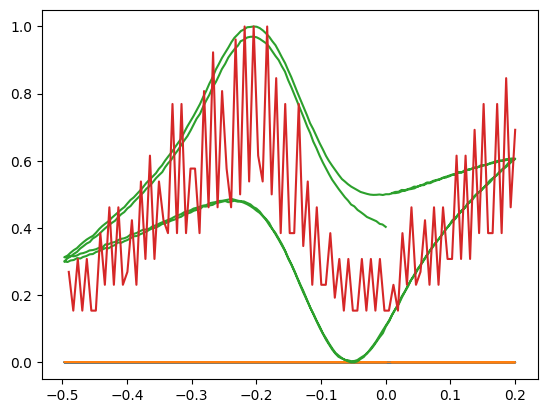

In [ ]:
C=np.array(CV.C)
VV=np.array(CV.V)
VV=VV*-1
CC=C
 

model = LinearRegression()
x = np.array(VV).reshape((-1, 1))
y = np.array( CC)
model.fit(x,y)
 

plt.plot(VV,CC)

slope=model.coef_.ravel()[0]
fit=( VV* slope)



plt.plot(VV,fit)

dV=np.abs(np.mean(np.diff(CV.V)))


C=CC-fit
intercept=-1*np.min(C)
C=C+intercept
guassSize=(np.max(C)-np.min(C))/2

plt.plot(VV,C /np.max(C))
X=[]
for i in range(len(C)):
    for j in range(int(C[i]*6000)):
        X.append(VV[i]+rng.standard_normal()*dV*3)
        
X=np.array(X)        
V,B=np.histogram(X,100)
plt.plot(B[1:],V/np.max(V)  )

In [ ]:


Y=X.reshape(-1, 1)
bandwidth = estimate_bandwidth(Y, quantile=0.2, n_samples=2000) 

guessedCoverage=[]
plt.plot(VV,CC )
for size_BW in range(1,6):

        ms = MeanShift(bandwidth=bandwidth/size_BW, bin_seeding=True)
        ms.fit(Y)
        labels_unique = np.unique(ms.labels_)
        cluster_centers=ms.cluster_centers_.ravel()
        std=[]
        weights=[]
        for l in labels_unique:
            YY= X[ms.labels_==l]
            weights.append( len(YY))
            std.append( np.std(YY))
        weights=np.array(weights)
        weights=weights/np.sum(weights)

        guess =[ slope,-1*intercept]
        for i in range(len(cluster_centers)):
            guess.append(weights[i]*guassSize *3.5)
            guess.append(cluster_centers[i])
            guess.append(std[i]*.75)
            
        guess.append(.2)
        guess.append(.65)
        guess.append(.08)
        guess=np.array(guess).ravel().astype(float)  


        print(len(weights))
        
        #D=multi_gaussianD(VV,guess)
        #plt.plot(VV,D)    
        
        try:
            popt, pcov = curve_fit(multi_gaussian,  VV ,CC, guess)
            
            plus=2
            nGuass=int((len(popt)-plus)/3)
            dum=np.zeros_like(popt)
            dum[:plus]=popt[:plus]
            back=multi_gaussianD(VV, dum)
            actual=np.zeros_like(back)
            hasPeak=False
            for i in range(nGuass):
                amp=popt[i*3+plus]
                energy=popt[i*3+plus+1]
                sig=popt[i*3+plus+2]
                g1=gaussian(VV, amp, energy, sig)
                
                if energy>.6 and energy<.7 and sig<.04 and np.max(g1)>.01  :
                    actual+=g1
                    hasPeak=True
                else:
                    back+=g1
            
            if hasPeak:
                plt.plot(VV,back+actual)
                Q=np.abs(np.sum(actual)/np.mean(CV.scanrate))*1e-6 #C
                M=Q/9.648533212e4 #9.648533212e4 C⋅mol−1
                Mol=M*6.02214076e23
                MolPcm2=Mol/areaCM2
                guessedCoverage.append(MolPcm2)
                print(sig,energy,Q,M,'%.3E'%(Mol),'%.3E'%(MolPcm2) )
            
                plt.plot(VV,back)
        except:
            pass
         
plt.show()



 

In [ ]:
C=np.array(CV.C)
VV=np.array(CV.V)
VV=VV[C>0]*-1
CC=C[C>0]
 

model = LinearRegression()
x = np.array(VV).reshape((-1, 1))
y = np.array(np.log(CC))
model.fit(x,y)
 

plt.plot(VV,CC)
exp_A=model.intercept_
exp_Beta=model.coef_*.8
fit=(np.exp(VV*exp_Beta+exp_A))


plt.plot(VV,fit)

dV=np.abs(np.mean(np.diff(CV.V)))


C=CC-fit
guassSize=(np.max(C)-np.min(C))/2

plt.plot(VV,C /np.max(C))
X=[]
for i in range(len(C)):
    for j in range(int(C[i]*6000)):
        X.append(VV[i]+rng.standard_normal()*dV)
        
X=np.array(X)        
V,B=np.histogram(X,100)
plt.plot(B[1:],V/np.max(V)  )

In [ ]:
def gaussian(x, A, x0, sig):
    #return A*np.exp(-(x-x0)**2/(2*sig**2))
    return A*np.exp( -.5*((x-x0)/sig)**2)
 
def multi_gaussianD(x, pars):
    #exp_A=pars[0]
    #exp_Beta=pars[1]
    offset=pars[0]
    fit=(np.exp(x*exp_Beta+exp_A))+offset
    #fit=np.zeros_like(x)+offset
    plus=1
    nGuass=int((len(pars)-plus)/3)
    for i in range(nGuass):
        fit += gaussian(x, pars[i*3+plus], pars[i*3+plus+1], pars[i*3+plus+2])
    return fit

def multi_gaussian(x, *pars):
    exp_A=pars[0]
    exp_Beta=pars[1]
    offset=pars[2]
    fit=(np.exp(VV*exp_Beta+exp_A))+offset
    nGuass=int((len(pars)-3)/3)
    for i in range(nGuass):
        fit += gaussian(x, pars[i*3+3], pars[i*3+4], pars[i*3+5])
    return fit

In [ ]:


Y=X.reshape(-1, 1)
bandwidth = estimate_bandwidth(Y, quantile=0.2, n_samples=500) 

for size_BW in range(1,6):

        ms = MeanShift(bandwidth=bandwidth/size_BW, bin_seeding=True)
        ms.fit(Y)
        labels_unique = np.unique(ms.labels_)
        cluster_centers=ms.cluster_centers_.ravel()
        std=[]
        weights=[]
        for l in labels_unique:
            YY= X[ms.labels_==l]
            weights.append( len(YY))
            std.append( np.std(YY))
        weights=np.array(weights)
        weights=weights/np.sum(weights)

        guess =[ np.min(CC)]
        for i in range(len(cluster_centers)):
            guess.append(weights[i]*guassSize*2)
            guess.append(cluster_centers[i])
            guess.append(bandwidth)
        guess=np.array(guess).ravel().astype(float)  


        print(len(weights))
        plt.plot(VV,CC )
        D=multi_gaussianD(VV,guess)
        plt.plot(VV,D)    
        try:
            popt, pcov = curve_fit(multi_gaussian,  VV ,CC, guess)
            break
        except:
            pass
        D=multi_gaussianD(VV,popt)
        
        #plt.show()



ms.cluster_centers_,np.max(sigma),bandwidth,std

In [ ]:
plt.plot(VV,CC )





plt.plot(VV,C )

plt.plot(VV,D)
areaM=100e-6*100e-6 #m^2
areaCM2=areaM*1e4

nGuass=int((len(popt)-2)/3)
for i in range(nGuass):
        g1 = gaussian(x, popt[i*3+2], popt[i*3+3], popt[i*3+4])
        energy=popt[i*3+3]
        Q=np.abs(np.sum(g1)/np.mean(CV.scanrate))*1e-6 #C
        M=Q/9.648533212e4 #9.648533212e4 C⋅mol−1
        Mol=M*6.02214076e23
        MolPcm2=Mol/areaCM2
        #if energy<0:
        print(areaCM2,energy,Q,M,'%.3E'%(Mol),'%.3E'%(MolPcm2) )
        plt.plot(VV,g1)
    
    
#plt.plot(VV,popt[1]  + VV* popt[0] )

In [ ]:


from sklearn.mixture import GaussianMixture
random_state = np.random.RandomState(seed=1)

Y= X.reshape(-1, 1)
N = np.arange(1, 11)
models = [None for i in range(len(N))]

for i in range(len(N)):
    models[i] = GaussianMixture(N[i]).fit(Y)

# compute the AIC and the BIC
AIC = [m.aic(Y) for m in models]
BIC = [m.bic(Y) for m in models]

In [ ]:



M_best = models[np.argmin(AIC)]
means= M_best.means_.ravel()
sigma= M_best.covariances_.ravel()**.5*.25
weight=M_best.weights_.ravel()


plt.plot(VV,C/np.max(C))
V_P=np.zeros_like(VV.astype(float))
for i in range(len(M_best.means_)):
    V_P+=weight[i]* np.exp( -1*(VV-means[i])**2/sigma[i])
plt.plot(VV,V_P/np.max(V_P) )
 
nGuass=(len(weight))

In [ ]:
mm

In [ ]:
from sklearn.mixture import GaussianMixture
random_state = np.random.RandomState(seed=1)

Y= X.reshape(-1, 1)
N = np.arange(1, 11)
models = [None for i in range(len(N))]

for i in range(len(N)):
    models[i] = GaussianMixture(N[i]).fit(Y)

# compute the AIC and the BIC
AIC = [m.aic(Y) for m in models]
BIC = [m.bic(Y) for m in models]

In [ ]:
M_best = models[np.argmin(AIC)]

sigma=np.sqrt(M_best.covariances_.ravel())

plt.plot(B[1:],V/np.max(V) )
Y_P=np.array(B[1:]).astype(float)
V_P=np.zeros_like(V.astype(float))
for i in range(len(M_best.means_)):
    V_P+=M_best.weights_[i]* np.exp( -1*(Y_P-M_best.means_[i])**2/sigma[i])
plt.plot(Y_P,V_P/np.max(V_P) )



In [ ]:
fig = plt.figure(figsize=(15, 5))
fig.subplots_adjust(left=0.12, right=0.97,
                    bottom=0.21, top=0.9, wspace=0.5)


# plot 1: data + best-fit mixture
ax = fig.add_subplot(131)
M_best = models[np.argmin(AIC)]

x = np.linspace(-6, 6, 1000)
logprob = M_best.score_samples(x.reshape(-1, 1))
responsibilities = M_best.predict_proba(x.reshape(-1, 1))
pdf = np.exp(logprob)
pdf_individual = responsibilities * pdf[:, np.newaxis]

ax.hist(X, 30, density=True, histtype='stepfilled', alpha=0.4)
ax.plot(x, pdf, '-k')
ax.plot(x, pdf_individual, '--k')
ax.text(0.04, 0.96, "Best-fit Mixture",
        ha='left', va='top', transform=ax.transAxes)
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')


# plot 2: AIC and BIC
ax = fig.add_subplot(132)
ax.plot(N, AIC, '-k', label='AIC')
ax.plot(N, BIC, '--k', label='BIC')
ax.set_xlabel('n. components')
ax.set_ylabel('information criterion')
ax.legend(loc=2)


# plot 3: posterior probabilities for each component
ax = fig.add_subplot(133)

p = responsibilities
p = p[:, (1, 0, 2)]  # rearrange order so the plot looks better
p = p.cumsum(1).T

ax.fill_between(x, 0, p[0], color='gray', alpha=0.3)
ax.fill_between(x, p[0], p[1], color='gray', alpha=0.5)
ax.fill_between(x, p[1], 1, color='gray', alpha=0.7)
ax.set_xlim(-6, 6)
ax.set_ylim(0, 1)
ax.set_xlabel('$x$')
ax.set_ylabel(r'$p({\rm class}|x)$')

ax.text(-5, 0.3, 'class 1', rotation='vertical')
ax.text(0, 0.5, 'class 2', rotation='vertical')
ax.text(3, 0.3, 'class 3', rotation='vertical')

plt.show()

In [ ]:
timeStep =np.mean(np.diff(CV.Time))
 
value =   CV.C *-1e6
height = np.max(value)/2


def CalcPeak(CV,scanDirection,width):
    CV2=CV.loc[ (CV.scanrate*scanDirection>0)]
    f = scipy.interpolate.interp1d(CV2.V, CV2.C*scanDirection)
    V=np.linspace(np.min(CV2.V),np.max(CV2.V),1000 )
    dt= np.mean(np.diff(V))/np.mean(CV2.scanrate)
     
    C=f(V)
    plt.plot(V,C)
    height = np.max(C)/2

    peak , _ =  scipy.signal.find_peaks(C, height=height)
     
    peakVoltage = np.mean(V[peak])
    peakCurrent = np.mean(V[peak])
    
    PeakV=V[ (np.abs(V- peakVoltage)<width)]
    PeakCur=C[ (np.abs(V- peakVoltage)<width)]
    plt.plot(PeakV,PeakCur)
    
    HM = np.max(PeakCur)/2
    vMax=V[(V>peakVoltage) & (C<HM)][0]
    vMin=V[(V<peakVoltage) & (C<HM)][-1]
    
    FWHM=vMax-vMin
    print(vMax,vMin,90/(FWHM*1000))

    

    Columbs=np.sum(CV2.C-CV2.C.iloc[0])*timeStep*-1/CV.totalcycle.iloc[0]
    print( Columbs ,'C')
    print(Columbs* 6.24150975*1e18 ,'electrons')
    print( Columbs* 6.24150975*1e18 *1.47968E-19/2*1e4,'cm^2')
    areaBelow_m2= Columbs * 6.24150975*1e18*1.47968E-19/2/2
    print( areaBelow_m2*1e4, 'cm^2')

CalcPeak(CV,-1,.25)

In [ ]:

plt.plot(x,f(x))

def datafit(x,N,u,sig,pw,C):
    y = N*np.exp(-(np.abs(x-u)/sig)**pw/2)+C
    return y

popt,popc = scipy.optimize.curve_fit(datafit,CV2.V,CV2.C*-1,p0=[height*2,peakVoltage,.1,2,0])

plt.plot(CV2.V,CV2.C*-1)
plt.plot(CV2.V,datafit(CV2.V,popt[0],popt[1],popt[2],popt[3],popt[4]))
plt.show()  
popt,popc

In [ ]:
plt.plot(upper.C)
        


In [ ]:

plt.plot(CV.V)        


In [ ]:

plt.plot(CV.scanrate)        


In [ ]:
vFilter =['300mv_','20mvs',"_TA"]
selected=[]
for cvName in CVs:
    filtered=True
    for filt in vFilter:
        
        if not (filt in cvName):
            filtered=False
    if filtered:
        selected.append(cvName)
print(selected)        
plt.figure    (figsize=(20,10))        
for cvName in selected:
    cv=CVs[cvName]
    x1=cv.Potential
    y1=cv.J
    plt.plot(x1,y1,label=cvName)
    cvl=cv.loc[cv.Segment == 3]
    #plt.plot(cvl.Potential,cvl.J,label=cvName)

    boring2 = cvl.loc[ cv.Potential<0.05]
    boring3 = boring2.loc[ cv.Potential>-.05]

    #plt.plot(boring3.Potential,boring3.J,label=cvName)

    res = stats.linregress(boring3.Potential, boring3.J)
    yMax =np.max(cvl.J)
    xMax= cvl.Potential.iloc[np.argmax(cvl.J)]
    baseline =yMax-( res.slope*xMax+res.intercept)
    #plt.plot(cvl.Potential,res.slope*cvl.Potential+res.intercept)
    text= "%.2f A/m^2 @  %.2fV"%(baseline, xMax)
    
    
    annot_max(x1,y1,text)
    
    

plt.title="All CVs"
plt.xlabel("E/V vs Ag/AgCl")
plt.ylabel("Current (A/m^2)")        
plt.legend()

In [ ]:
vFilter =['300mv_','100mvs',"_TA"]
selected=[]
for cvName in CVs:
    filtered=True
    for filt in vFilter:
        
        if not (filt in cvName):
            filtered=False
    if 'BIO' in cvName:
        filtered=False
    if filtered:
        selected.append(cvName)
    if cvName =='KOH_EC_300mv_100mvs':
        selected.append(cvName)
    
plt.figure    (figsize=(10,5))        
cc=0
"""Flame Annealed	None	Timeetch"""
coverage=[0.95,0,0.83,0.83]

for cvName in selected:
    cv=CVs[cvName]
    x1=cv.Potential
    y1=cv.J

    cvl=cv.loc[cv.Segment == 3]
    #plt.plot(cvl.Potential,cvl.J,label=cvName)

    boring2 = cvl.loc[ cv.Potential<0.05]
    boring3 = boring2.loc[ cv.Potential>-.05]

    #plt.plot(boring3.Potential,boring3.J,label=cvName)

    res = stats.linregress(boring3.Potential, boring3.J)
    yMax =np.max(cvl.J)
    xMax= cvl.Potential.iloc[np.argmax(cvl.J)]
    baseline =yMax-( res.slope*xMax+res.intercept)
    #plt.plot(cvl.Potential,res.slope*cvl.Potential+res.intercept)
    #text= (r"%.2f $A/m^{2}$, C=%.0f%%, E=%.2fV")%(baseline,coverage[cc]*100, xMax)
    
    plt.plot(x1,y1,label=cvName)
    #annot_max(x1,y1,text)
    cc+=1
    
    

plt.title="All CVs"
plt.xlabel("E/V vs Ag/AgCl")
plt.ylabel("Current (A/m^2)")        
plt.legend()

In [ ]:
vFilter =['300mv_','100mvs',"_TA"]
selected=[]
for cvName in CVs:
    if cvName =='Blank_60mV':
        selected.append(cvName)
    if cvName =='Biotin pH13_60mV':
        selected.append(cvName)
    if cvName =='Biotin A_60mV':
        selected.append(cvName)        
        
plt.figure    (figsize=(10,5))        
cc=0
"""Flame Annealed	None	Timeetch"""
coverage=[0.95,0,0.83,0.83]

for cvName in selected:
    cv=CVs[cvName]
    x1=cv.Potential
    y1=cv.J

    cvl=cv.loc[cv.Segment == 3]
    #plt.plot(cvl.Potential,cvl.J,label=cvName)

    boring2 = cvl.loc[ cv.Potential<0.05]
    boring3 = boring2.loc[ cv.Potential>-.05]

    #plt.plot(boring3.Potential,boring3.J,label=cvName)

    res = stats.linregress(boring3.Potential, boring3.J)
    yMax =np.max(cvl.J)
    xMax= cvl.Potential.iloc[np.argmax(cvl.J)]
    baseline =yMax-( res.slope*xMax+res.intercept)
    #plt.plot(cvl.Potential,res.slope*cvl.Potential+res.intercept)
    #text= (r"%.2f $A/m^{2}$, C=%.0f%%, E=%.2fV")%(baseline,coverage[cc]*100, xMax)
    
    plt.plot(x1,y1,label=cvName)
    #annot_max(x1,y1,text)
    cc+=1
    
    

plt.title="All CVs"
plt.xlabel("E/V vs Ag/AgCl")
plt.ylabel("Current (A/m^2)")        
plt.legend()

In [ ]:
def annot_max(x,y,xmax,ymax,text, ax=None):


    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="data",
              arrowprops=arrowprops, bbox=bbox_props, ha="left", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(xmax-.1,ymax+.1), **kw)

#TEE_TAT_100mV_100mvs
vFilter =["TEE_TAT",'500mV']
selected=[]
for cvName in CVs:
    filtered=True
    for filt in vFilter:
        
        if not (filt in cvName):
            filtered=False
    if filtered:
        selected.append(cvName)
plt.figure    (figsize=(20,10))        
cc=0
"""Flame Annealed	None	Timeetch"""
coverage=[0.19,0.13]

for cvName in selected:
    cv=CVs[cvName]
    x1=cv.Potential
    y1=cv.J

    cvl=cv.loc[cv.Segment == 3]
    #plt.plot(cvl.Potential,cvl.J,label=cvName)

    boring2 = cvl.loc[ cv.Potential<0.25]
    boring3 = boring2.loc[ cv.Potential>0.2]

    #plt.plot(boring3.Potential,boring3.J,label=cvName)

    res = stats.linregress(boring3.Potential, boring3.J)
    yMax =np.max(cvl.J)
    xMax=.45# cvl.Potential.iloc[np.argmax(cvl.J)]
    baseline =yMax-( res.slope*xMax+res.intercept)
    #plt.plot(cvl.Potential,res.slope*cvl.Potential+res.intercept)
    text= (r"%.2f $A/m^{2}$, C=%.0f%%, E=%.2fV")%(baseline,coverage[cc]*100, xMax)
    
    plt.plot(x1,y1,label=cvName)
    annot_max(x1,y1,xMax,yMax,text)
    cc+=1
    
    

plt.title="All CVs"
plt.xlabel("E/V vs Ag/AgCl")
plt.ylabel("Current (A/m^2)")        
plt.legend()

In [ ]:
def annot_max(x,y,text, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()

    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="data",
              arrowprops=arrowprops, bbox=bbox_props, ha="left", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(xmax-.1,ymax+.5), **kw)
    
    xmax = x[np.argmin(y)]
    ymax = y.min()

    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="data",
              arrowprops=arrowprops, bbox=bbox_props, ha="left", va="top")
    text= (r"E=%.2fV")%( xmax)
    ax.annotate(text, xy=(xmax, ymax), xytext=(xmax+.1,ymax+.5), **kw)    

vFilter =['300mv_',"TE_TA"]
selected=[]
for cvName in CVs:
    filtered=True
    for filt in vFilter:
        
        if not (filt in cvName):
            filtered=False
    if filtered:
        selected.append(cvName)
plt.figure    (figsize=(20,10))        
cc=0
"""Flame Annealed	None	Timeetch"""
coverage=[0.95,0,0.83,0.83]

for cvName in selected:
    cv=CVs[cvName]
    x1=cv.Potential
    y1=cv.J

    cvl=cv.loc[cv.Segment == 3]
    #plt.plot(cvl.Potential,cvl.J,label=cvName)

    boring2 = cvl.loc[ cv.Potential<0.05]
    boring3 = boring2.loc[ cv.Potential>-.05]

    #plt.plot(boring3.Potential,boring3.J,label=cvName)

    res = stats.linregress(boring3.Potential, boring3.J)
    yMax =np.max(cvl.J)
    xMax= cvl.Potential.iloc[np.argmax(cvl.J)]
    baseline =yMax-( res.slope*xMax+res.intercept)
    #plt.plot(cvl.Potential,res.slope*cvl.Potential+res.intercept)
    text= (r"%.2f $A/m^{2}$,  E=%.2fV")%(baseline, xMax)
    
    plt.plot(x1,y1,label=cvName)
    annot_max(x1,y1,text)
    cc+=1
    
    

plt.title="All CVs"
plt.xlabel("E/V vs Ag/AgCl")
plt.ylabel("Current (A/m^2)")        
plt.legend()

In [ ]:
vFilter =["TE_TA",'20mvs']
selected=[]
for cvName in CVs:
    filtered=True
    for filt in vFilter:
        
        if not (filt in cvName):
            filtered=False
    if filtered:
        selected.append(cvName)
plt.figure    (figsize=(20,10))        
cc=0
"""Flame Annealed	None	Timeetch"""
coverage=[0.95,0,0.83,0.83]

for cvName in selected:
    cv=CVs[cvName]
    x1=cv.Potential
    y1=cv.J

    cvl=cv.loc[cv.Segment == 3]
    #plt.plot(cvl.Potential,cvl.J,label=cvName)

    boring2 = cvl.loc[ cv.Potential<0.05]
    boring3 = boring2.loc[ cv.Potential>-.05]

    #plt.plot(boring3.Potential,boring3.J,label=cvName)

   
    plt.plot(x1,y1,label=cvName)
    cc+=1
    
    

plt.title="All CVs"
plt.xlabel("E/V vs Ag/AgCl")
plt.ylabel("Current (A/m^2)")        
plt.legend()

In [ ]:
!pip install pythonnet 